# indah wulandari 202231051

In [1]:
import numpy as np
import pylab as plb

#titik yang mana mengghubungan antara node cara membaca berarti (0,1) = saling berhubungan
points_list = [(0,1),(1,6),(5,6),(5,4),(1,2),(2,3),(2,7)]

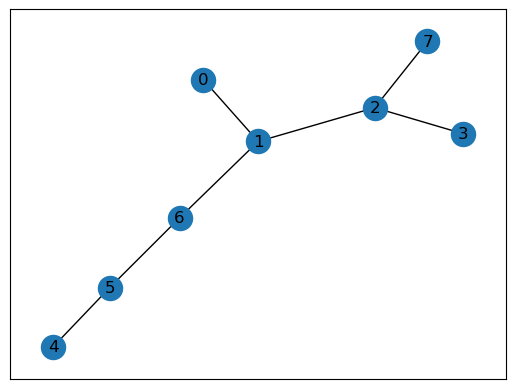

In [2]:
goal = 7

import networkx as nx
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plb.show()

In [3]:
#titik maksimal matriks, ini wajib didefenisikan sebagai jalur pembelajaran nantinya
MATRIX_SIZE = 8 #sesuai dengan jumlah dengan jumlah nodes nya

#membuat titik-titik awal menjadi matriks 8*8
R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
print(R)

R *= -1
print(R)


[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


In [4]:
for point in points_list:
  
    if point[1] == goal:
        R[point]=100
        
    else:
        R[point] = 0
    
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]]=0
    
#mendefisikan 100 dalam matrik   
R[goal,goal]=100
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

#Aksi yang akan diambil dari vector
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

#Mesin memutuskan untuk mesin selanjutnya
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

#menyimpan hasil dari langkah yang diambil
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 164.0
Score: 209.7560975609756
max_value 80.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 80.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 80.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 0.0
Score: 258.5365853658536
max_value 64.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 80.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 64.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 0.0
Score: 297.56097560975

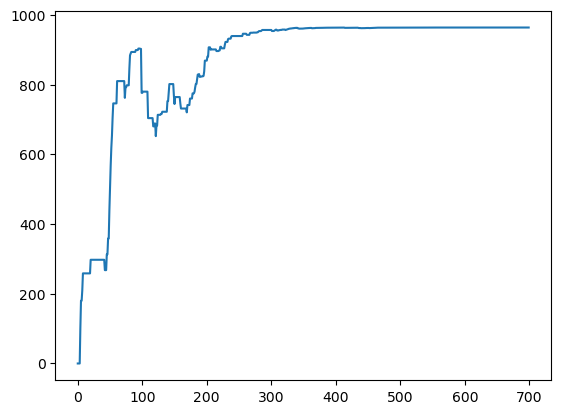

In [6]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plb.plot(scores)
plb.show()